# Rf 3 0 9_Ndimplot
Multidimensional models: making 2/3 dimensional plots of p.d.f.s and datasets



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:49 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooConstVar.h"
#include "RooGaussian.h"
#include "RooProdPdf.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"
#include "RooPlot.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create 2d model and dataset
 -----------------------------------------------------

Create observables

In [3]:
RooRealVar x("x", "x", -5, 5);
RooRealVar y("y", "y", -5, 5);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create parameters

In [4]:
RooRealVar a0("a0", "a0", -3.5, -5, 5);
RooRealVar a1("a1", "a1", -1.5, -1, 1);
RooRealVar sigma("sigma", "width of gaussian", 1.5);

Create interpreted function f(y) = a0 - a1*sqrt(10*abs(y))

In [5]:
RooFormulaVar fy("fy", "a0-a1*sqrt(10*abs(y))", RooArgSet(y, a0, a1));

Create gauss(x,f(y),s)

In [6]:
RooGaussian model("model", "Gaussian with shifting mean", x, fy, sigma);

Sample dataset from gauss(x,y)

In [7]:
RooDataSet *data = model.generate(RooArgSet(x, y), 10000);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make 2d plots of data and model
 -------------------------------------------------------------

Create and fill root 2d histogram (20x20 bins) with contents of dataset
 TH2D* hh_data = data->createHistogram("hh_data",x,Binning(20),YVar(y,Binning(20))) ;

In [8]:
TH1 *hh_data = data->createHistogram("x,y", 20, 20);

Create and fill root 2d histogram (50x50 bins) with sampling of pdf
 TH2D* hh_pdf = model.createHistogram("hh_model",x,Binning(50),YVar(y,Binning(50))) ;

In [9]:
TH1 *hh_pdf = model.createHistogram("x,y", 50, 50);
hh_pdf->SetLineColor(kBlue);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Create 3d model and dataset
 -----------------------------------------------------

Create observables

In [10]:
RooRealVar z("z", "z", -5, 5);

RooGaussian gz("gz", "gz", z, RooConst(0), RooConst(2));
RooProdPdf model3("model3", "model3", RooArgSet(model, gz));

RooDataSet *data3 = model3.generate(RooArgSet(x, y, z), 10000);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make 3d plots of data and model
 -------------------------------------------------------------

Create and fill root 2d histogram (8x8x8 bins) with contents of dataset

In [11]:
TH1 *hh_data3 = data3->createHistogram("hh_data3", x, Binning(8), YVar(y, Binning(8)), ZVar(z, Binning(8)));

Create and fill root 2d histogram (20x20x20 bins) with sampling of pdf

In [12]:
TH1 *hh_pdf3 = model3.createHistogram("hh_model3", x, Binning(20), YVar(y, Binning(20)), ZVar(z, Binning(20)));
hh_pdf3->SetFillColor(kBlue);

TCanvas *c1 = new TCanvas("rf309_2dimplot", "rf309_2dimplot", 800, 800);
c1->Divide(2, 2);
c1->cd(1);
gPad->SetLeftMargin(0.15);
hh_data->GetZaxis()->SetTitleOffset(1.4);
hh_data->Draw("lego");
c1->cd(2);
gPad->SetLeftMargin(0.20);
hh_pdf->GetZaxis()->SetTitleOffset(2.5);
hh_pdf->Draw("surf");
c1->cd(3);
gPad->SetLeftMargin(0.15);
hh_data->GetZaxis()->SetTitleOffset(1.4);
hh_data->Draw("box");
c1->cd(4);
gPad->SetLeftMargin(0.15);
hh_pdf->GetZaxis()->SetTitleOffset(2.5);
hh_pdf->Draw("cont3");

TCanvas *c2 = new TCanvas("rf309_3dimplot", "rf309_3dimplot", 800, 400);
c2->Divide(2);
c2->cd(1);
gPad->SetLeftMargin(0.15);
hh_data3->GetZaxis()->SetTitleOffset(1.4);
hh_data3->Draw("lego");
c2->cd(2);
gPad->SetLeftMargin(0.15);
hh_pdf3->GetZaxis()->SetTitleOffset(1.4);
hh_pdf3->Draw("iso");

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Draw all canvases 

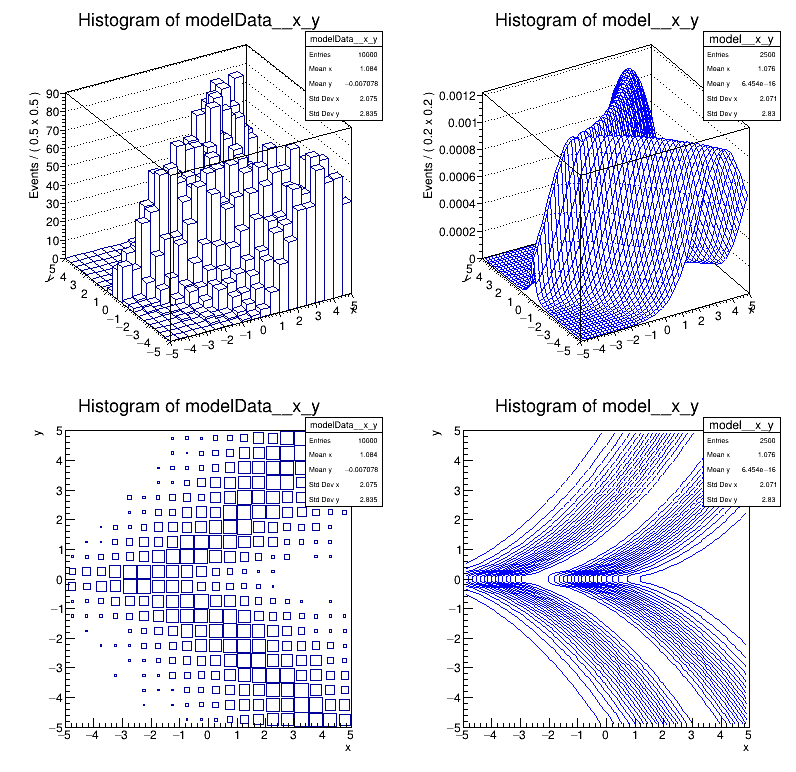

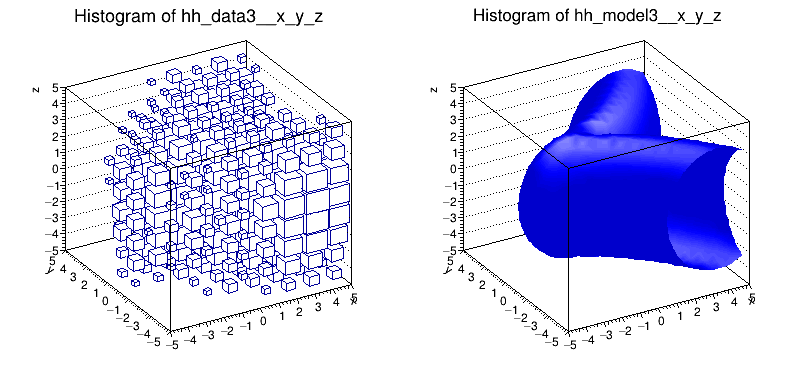

In [13]:
gROOT->GetListOfCanvases()->Draw()